<a href="https://colab.research.google.com/github/mohini111/Police-Bias/blob/main/UK_Policing_Stop_Search_Data_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Setup 

In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
figsize = (16,8)

### Loading the data 

In [ ]:
# Load all the data files
import glob

df_vt = pd.concat(map(pd.read_csv, glob.glob('*.csv')))

In [ ]:
df_vt.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2020-07-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,NaN,NaN,NaN
1,Person and Vehicle search,2020-07-01T00:20:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
2,Person and Vehicle search,2020-07-01T01:15:00+00:00,NaN,NaN,51.475247,-2.545262,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
3,Person and Vehicle search,2020-07-01T02:00:00+00:00,NaN,NaN,51.475247,-2.545262,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
4,Person and Vehicle search,2020-07-01T02:06:00+00:00,NaN,NaN,51.464083,-2.510667,Male,over 34,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


In [ ]:
df_vt.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Latitude', 'Longitude', 'Gender', 'Age range',
       'Self-defined ethnicity', 'Officer-defined ethnicity', 'Legislation',
       'Object of search', 'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

### Cleaning the dataset

In [ ]:
df_vt.count()

Type                                        28444
Date                                        28444
Part of a policing operation                 7183
Policing operation                              0
Latitude                                    23294
Longitude                                   23294
Gender                                      26212
Age range                                   25960
Self-defined ethnicity                      25542
Officer-defined ethnicity                   25568
Legislation                                 28082
Object of search                            27930
Outcome                                     27620
Outcome linked to object of search          16298
Removal of more than just outer clothing    24484
dtype: int64

In [ ]:
df_vt.shape

(28444, 15)

In [ ]:
df_vt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28444 entries, 0 to 673
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      28444 non-null  object 
 1   Date                                      28444 non-null  object 
 2   Part of a policing operation              7183 non-null   object 
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  23294 non-null  float64
 5   Longitude                                 23294 non-null  float64
 6   Gender                                    26212 non-null  object 
 7   Age range                                 25960 non-null  object 
 8   Self-defined ethnicity                    25542 non-null  object 
 9   Officer-defined ethnicity                 25568 non-null  object 
 10  Legislation                         

In [ ]:
# Fill missing search type values with placeholder
df_vt.fillna('N/A', inplace=True)

# Drop columns with missing values
df_vt.dropna(axis=1, inplace=True)

In [ ]:
df_vt.count()

Type                                        28444
Date                                        28444
Part of a policing operation                28444
Policing operation                          28444
Latitude                                    28444
Longitude                                   28444
Gender                                      28444
Age range                                   28444
Self-defined ethnicity                      28444
Officer-defined ethnicity                   28444
Legislation                                 28444
Object of search                            28444
Outcome                                     28444
Outcome linked to object of search          28444
Removal of more than just outer clothing    28444
dtype: int64

### Stops By Gender

In [ ]:
df_vt['Gender'].value_counts()

Male      23230
Female     2981
N/A        2232
Other         1
Name: Gender, dtype: int64

### Part of a policing operation 

In [ ]:
df_vt['Part of a policing operation'].value_counts()

N/A      21261
False     6727
True       456
Name: Part of a policing operation, dtype: int64

### Stops By Self-defined ethnicity 

In [ ]:
df_vt['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   14848
Other ethnic group - Not stated                                                          4704
N/A                                                                                      2902
White - Any other White background                                                       1354
Black/African/Caribbean/Black British - African                                           864
Asian/Asian British - Any other Asian background                                          636
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background      569
Black/African/Caribbean/Black British - Caribbean                                         557
Asian/Asian British - Pakistani                                                           452
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background                 276
Mixed/Multiple ethnic groups - White and Black Caribbean    

### Stops By Officer-defined ethnicity 

In [ ]:
df_vt['Officer-defined ethnicity'].value_counts()

White    19434
Black     3308
N/A       2876
Asian     2089
Other      524
Mixed      213
Name: Officer-defined ethnicity, dtype: int64

### Stop Outcomes 

In [ ]:
df_vt['Outcome'].value_counts()

A no further action disposal       20767
Arrest                              3586
Community resolution                1582
N/A                                  824
Khat or Cannabis warning             809
Summons / charged by post            755
Caution (simple or conditional)       89
Penalty Notice for Disorder           32
Name: Outcome, dtype: int64

### Stops By Age 

In [ ]:
df_vt['Age range'].value_counts()

18-24       8324
25-34       6273
over 34     6255
10-17       5048
N/A         2484
under 10      60
Name: Age range, dtype: int64

### Analyze Outcomes data

In [ ]:
df_vt['Outcome'].value_counts()

A no further action disposal       20767
Arrest                              3586
Community resolution                1582
N/A                                  824
Khat or Cannabis warning             809
Summons / charged by post            755
Caution (simple or conditional)       89
Penalty Notice for Disorder           32
Name: Outcome, dtype: int64

In [ ]:
def compute_outcome_stats(df):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(df)
    n_disposals = len(df[df['Outcome'] == 'A no further action disposal'])
    n_arrests = len(df[df['Outcome'] == 'Arrest'])
    n_comminity_resolutions = len(df[df['Outcome'] == 'Community resolution'])
    n_khat_cannabis_warnings = len(df[df['Outcome'] == 'Khat or Cannabis warning'])
    n_summons = len(df[df['Outcome'] == 'Summons / charged by post'])
    n_cautions = len(df[df['Outcome'] == 'Caution (simple or conditional)'])
    n_notices = len(df[df['Outcome'] == 'Penalty Notice for Disorder'])
    
    arrest_rate = n_arrests / n_total
    
    return(pd.Series(data = { 
        'n_total': n_total,
        'n_disposals': n_disposals,
        'n_arrests': n_arrests,
        'n_comminity_resolutions':n_comminity_resolutions,
        'n_khat_cannabis_warnings':n_khat_cannabis_warnings,
        'n_summons':n_summons,
        'n_cautions':n_cautions,
        'n_notices':n_notices,
        'arrest_rate': arrest_rate
    }))

In [ ]:
compute_outcome_stats(df_vt)

n_total                     28444.000000
n_disposals                 20767.000000
n_arrests                    3586.000000
n_comminity_resolutions      1582.000000
n_khat_cannabis_warnings      809.000000
n_summons                     755.000000
n_cautions                     89.000000
n_notices                      32.000000
arrest_rate                     0.126072
dtype: float64

### Breakdown By Gender

In [ ]:
df_vt.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_disposals,n_arrests,n_comminity_resolutions,n_khat_cannabis_warnings,n_summons,n_cautions,n_notices,arrest_rate
Gender,,,,,,,,,
Female,2981.0,2252.0,344.0,175.0,66.0,56.0,7.0,4.0,0.115398
Male,23230.0,16938.0,2990.0,1349.0,694.0,643.0,74.0,24.0,0.128713
N/A,2232.0,1576.0,252.0,58.0,49.0,56.0,8.0,4.0,0.112903
Other,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Breakdown By Ethicity 

In [ ]:
df_vt.groupby('Officer-defined ethnicity').apply(compute_outcome_stats)

,n_total,n_disposals,n_arrests,n_comminity_resolutions,n_khat_cannabis_warnings,n_summons,n_cautions,n_notices,arrest_rate
Officer-defined ethnicity,,,,,,,,,
Asian,2089.0,1534.0,238.0,136.0,71.0,82.0,4.0,5.0,0.113930
Black,3308.0,2480.0,426.0,150.0,66.0,138.0,9.0,1.0,0.128779
Mixed,213.0,156.0,33.0,6.0,8.0,6.0,0.0,0.0,0.154930
N/A,2876.0,1964.0,269.0,179.0,46.0,60.0,11.0,2.0,0.093533
Other,524.0,388.0,76.0,20.0,12.0,16.0,2.0,2.0,0.145038
White,19434.0,14245.0,2544.0,1091.0,606.0,453.0,63.0,22.0,0.130905


<AxesSubplot:title={'center':'Arrest Rate By ethnicity'}, ylabel='Officer-defined ethnicity'>

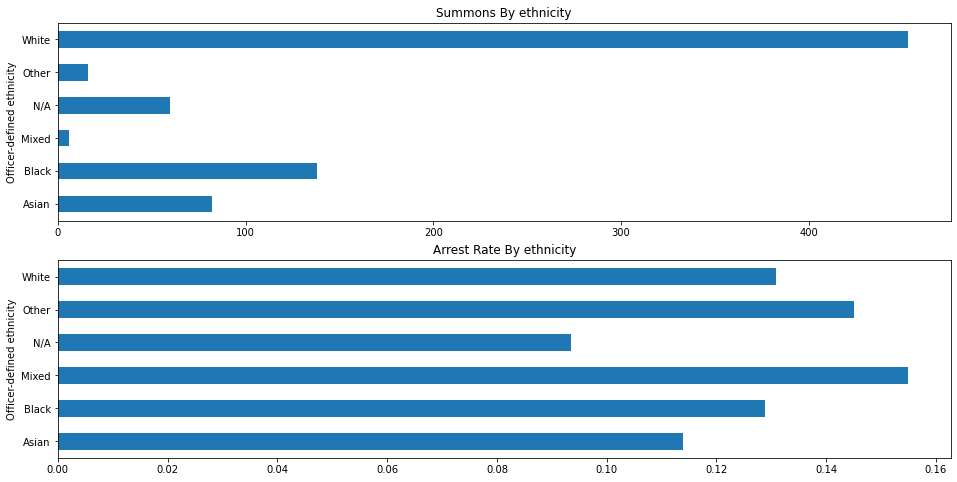

In [ ]:
ethnicity_agg = df_vt.groupby(['Officer-defined ethnicity']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
ethnicity_agg['n_summons'].plot.barh(ax=axes[0], figsize=figsize, title="Summons By ethnicity")
ethnicity_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By ethnicity')

### Group By Ethnicity and Object of Search

In [ ]:
df_vt.groupby(['Officer-defined ethnicity','Object of search']).apply(compute_outcome_stats)

n_total  \
Officer-defined ethnicity Object of search                                      
Asian                     Anything to threaten or harm anyone            63.0   
                          Article for use in theft                      101.0   
                          Articles for use in criminal damage             8.0   
                          Controlled drugs                             1633.0   
                          Detailed object of search unavailable           3.0   
...                                                                       ...   
White                     Goods on which duty has not been paid etc.     15.0   
                          N/A                                           312.0   
                          Offensive weapons                            1913.0   
                          Psychoactive substances                         8.0   
                          Stolen goods                                 1312.0   

                                                                      n_disposals  \
Officer-defined ethnicity Object of search                                          
Asian                     Anything to threaten or harm anyone                55.0   
                          Article for use in theft                           80.0   
                          Articles for use in criminal damage                 7.0   
                          Controlled drugs                                 1148.0   
                          Detailed object of search unavailable               3.0   
...                                                                           ...   
White                     Goods on which duty has not been paid etc.         13.0   
                          N/A                                               182.0   
                          Offensive weapons                                1494.0   
                          Psychoactive substances                             6.0   
                          Stolen goods                                      877.0   

                                                                      n_arrests  \
Officer-defined ethnicity Object of search                                        
Asian                     Anything to threaten or harm anyone               8.0   
                          Article for use in theft                         11.0   
                          Articles for use in criminal damage               1.0   
                          Controlled drugs                                191.0   
                          Detailed object of search unavailable             0.0   
...                                                                         ...   
White                     Goods on which duty has not been paid etc.        1.0   
                          N/A                                              31.0   
                          Offensive weapons                               327.0   
                          Psychoactive substances                           2.0   
                          Stolen goods                                    278.0   

                                                                      n_comminity_resolutions  \
Officer-defined ethnicity Object of search                                                      
Asian                     Anything to threaten or harm anyone                             0.0   
                          Article for use in theft                                        7.0   
                          Articles for use in criminal damage                             0.0   
                          Controlled drugs                                              124.0   
                          Detailed object of search unavailable                           0.0   
...                                                                                       ...   
White                     Goods on which duty has not 

In [ ]:
# Create new column to represent whether the driver is White
df_vt['is_white'] = df_vt['Officer-defined ethnicity'] == 'White'

# Remove Object of search with too few data points
df_vt_filtered = df_vt[~df_vt['Object of search'].isin(['N/A', 'Evidence of wildlife offences', 'Crossbows',
                                                        'Detailed object of search unavailable', 'Psychoactive substances',
                                                        'Game or poaching equipment', 'Goods on which duty has not been paid etc.'
                                                 'Fireworks'])]

In [ ]:
df_vt_filtered.groupby(['is_white','Object of search']).apply(compute_outcome_stats)

n_total  n_disposals  \
is_white Object of search                                                   
False    Anything to threaten or harm anyone           355.0        284.0   
         Article for use in theft                      514.0        401.0   
         Articles for use in criminal damage            78.0         64.0   
         Controlled drugs                             6380.0       4502.0   
         Evidence of offences under the Act            141.0        110.0   
         Firearms                                       68.0         56.0   
         Fireworks                                       9.0          9.0   
         Goods on which duty has not been paid etc.      4.0          4.0   
         Offensive weapons                             813.0        705.0   
         Stolen goods                                  422.0        307.0   
True     Anything to threaten or harm anyone           409.0        327.0   
         Article for use in theft                     1574.0       1258.0   
         Articles for use in criminal damage           380.0        299.0   
         Controlled drugs                            13114.0       9477.0   
         Evidence of offences under the Act            242.0        188.0   
         Firearms                                       77.0         59.0   
         Fireworks                                      55.0         47.0   
         Goods on which duty has not been paid etc.     15.0         13.0   
         Offensive weapons                            1913.0       1494.0   
         Stolen goods                                 1312.0        877.0   

                                                     n_arrests  \
is_white Object of search                                        
False    Anything to threaten or harm anyone              23.0   
         Article for use in theft                         78.0   
         Articles for use in criminal damage              10.0   
         Controlled drugs                                754.0   
         Evidence of offences under the Act               15.0   
         Firearms                                          3.0   
         Fireworks                                         0.0   
         Goods on which duty has not been paid etc.        0.0   
         Offensive weapons                                78.0   
         Stolen goods                                     77.0   
True     Anything to threaten or harm anyone              67.0   
         Article for use in theft                        232.0   
         Articles for use in criminal damage              49.0   
         Controlled drugs                               1506.0   
         Evidence of offences under the Act               36.0   
         Firearms                                         12.0   
         Fireworks                                         2.0   
         Goods on which duty has not been paid etc.        1.0   
         Offensive weapons                               327.0   
         Stolen goods                                    278.0   

                                                     n_comminity_resolutions  \
is_white Object of search                                                      
False    Anything to threaten or harm anyone                             3.0   
         Article for use in theft                                       12.0   
         Articles for use in criminal damage                             0.0   
         Controlled drugs                                              450.0   
         Evidence of offences under the Act                              3.0   
         Firearms                                                        0.0   
         Fireworks                                                       0.0   
         Goods on which duty has not been paid etc.                      0.0   
         Offensive weapons                                              11.0   
         Stolen goods    

### Visualize stop outcome and  Object of search

<AxesSubplot:title={'center':'Summons By Ethnicity and Object of search'}, xlabel='Object of search'>

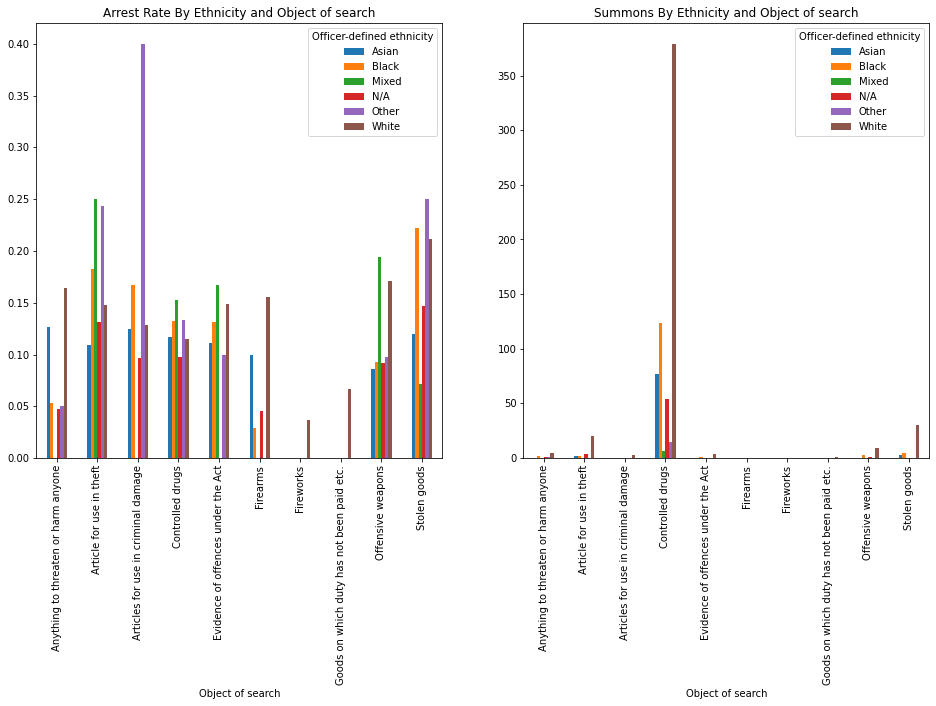

In [ ]:
ethnicity_stats = df_vt_filtered.groupby(['Object of search', 'Officer-defined ethnicity']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
ethnicity_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrest Rate By Ethnicity and Object of search')
ethnicity_stats.plot.bar(y='n_summons', ax=axes[1], title='Summons By Ethnicity and Object of search')

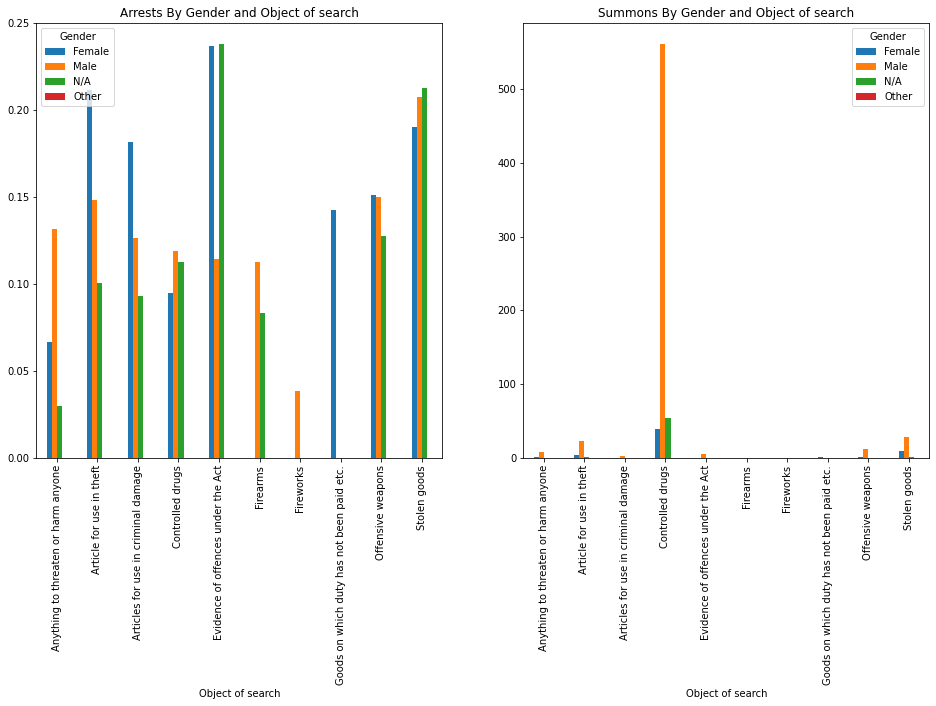

In [ ]:
gender_stats = df_vt_filtered.groupby(['Object of search','Gender']).apply(compute_outcome_stats).unstack()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
ax_gender_arrests = gender_stats.plot.bar(y='arrest_rate', ax=axes[0], title='Arrests By Gender and Object of search', figsize=figsize)
ax_gender_citations = gender_stats.plot.bar(y='n_summons', ax=axes[1], title='Summons By Gender and Object of search', figsize=figsize)